In [31]:
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf

In [32]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [35]:
image_shape = (32, 32, 3) #width, height, depth
x = tf.placeholder(tf.float32, shape=[None, *image_shape], name='x')
x.get_shape().as_list()[-1]
#x_tensor.get_shape().as_list()[-1]

3

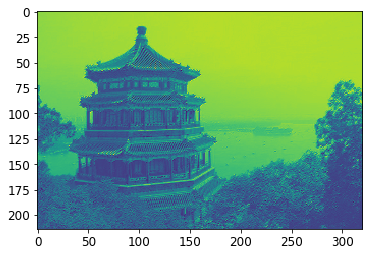

In [34]:
# Load sample images
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1  # vertical line
filters_test[3, :, :, 1] = 1  # horizontal line

conv_ksize = (3, 3)
image_shape = (width, height, channels)
x_tensor = tf.placeholder(tf.float32, shape=[None, *image_shape], name='x')
conv_num_outputs = 10

W = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1], x_tensor.get_shape().as_list()[-1], 
                                         conv_num_outputs],mean=0.0,stddev = 0.05))

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, W, strides=[1,2,2,1], padding="SAME") #use padding if necessary

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1])  # plot 1st image's 2nd feature map
plt.show()

In [28]:
dataset

array([[[[ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         ..., 
         [ 250.,  251.,  255.],
         [ 250.,  251.,  255.],
         [ 250.,  251.,  255.]],

        [[ 172.,  199.,  229.],
         [ 173.,  200.,  230.],
         [ 173.,  200.,  230.],
         ..., 
         [ 251.,  252.,  255.],
         [ 251.,  252.,  255.],
         [ 251.,  252.,  255.]],

        [[ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         ..., 
         [ 252.,  253.,  255.],
         [ 252.,  253.,  255.],
         [ 252.,  253.,  255.]],

        ..., 
        [[  88.,   80.,    7.],
         [ 147.,  138.,   69.],
         [ 122.,  116.,   38.],
         ..., 
         [  39.,   42.,   33.],
         [   8.,   14.,    2.],
         [   6.,   12.,    0.]],

        [[ 122.,  112.,   41.],
         [ 129.,  120.,   53.],
         [ 118.,  112.,   36.],
         ..., 
         [   9.,   12.,    3.],
       